In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from plotnine import *

%matplotlib inline

C:\Users\asmaa mohammed\AppData\Local\Temp\ipykernel_2808\1858987229.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [7]:
data = pd.read_csv("CC GENERAL.csv", header = 0, index_col = 'CUST_ID')

In [8]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [10]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
data_copy = data.copy()

### i choosed to fill data with median

In [12]:
data_copy['MINIMUM_PAYMENTS'].fillna(data_copy['MINIMUM_PAYMENTS'].median(), inplace = True)

In [13]:
data_copy['CREDIT_LIMIT'].fillna(data_copy['CREDIT_LIMIT'].median(), inplace = True)

In [14]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [15]:
data_copy.isnull().sum().sum()

0

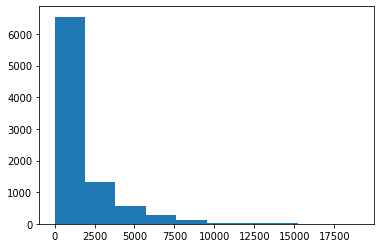

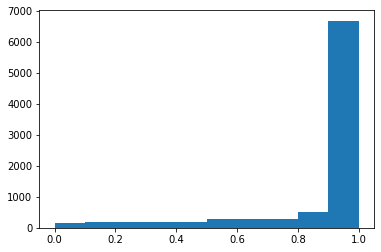

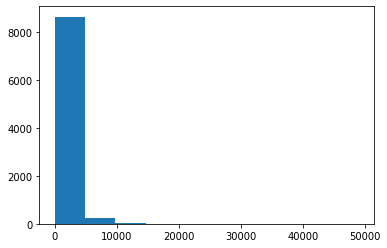

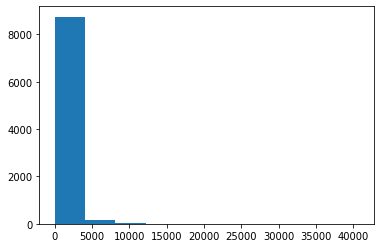

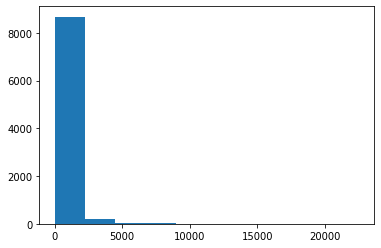

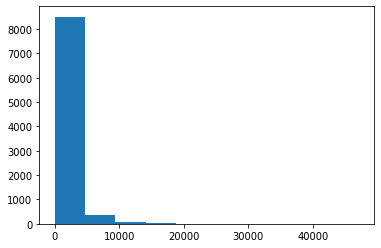

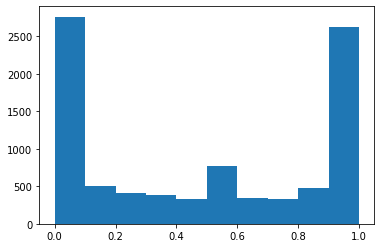

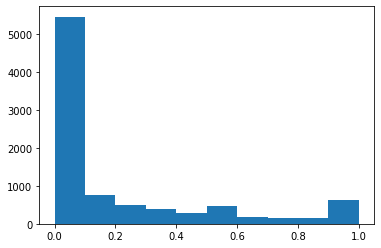

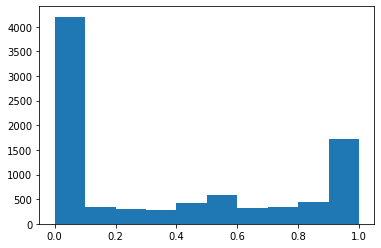

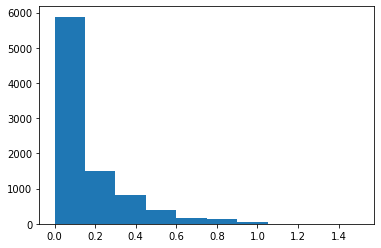

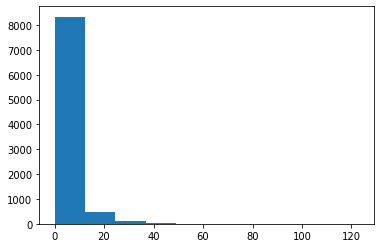

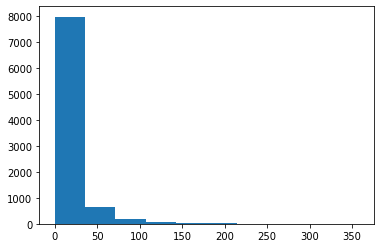

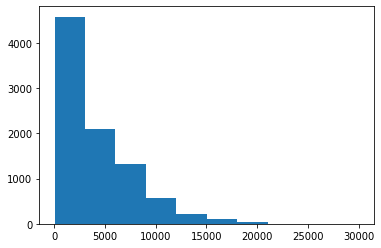

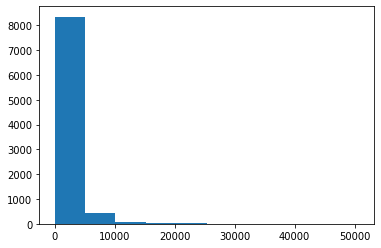

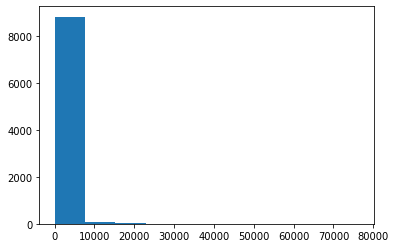

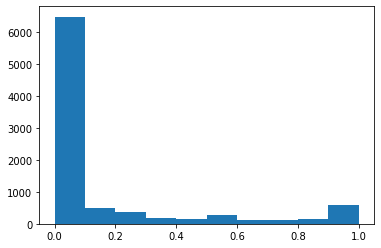

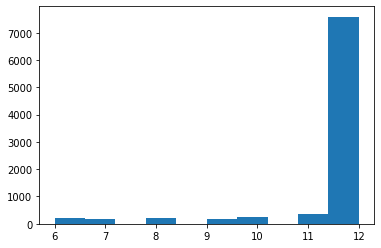

In [13]:
for col in data_copy.columns:
    plt.hist(data_copy[col])
    plt.show()

### majority of data has right skewed so i used Standard scaler to normalize data as outliers may be important to data informartion

In [16]:
data_norm = StandardScaler().fit_transform(data_copy)

In [17]:
new = pd.DataFrame(data_norm)
new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


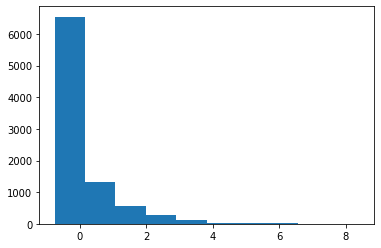

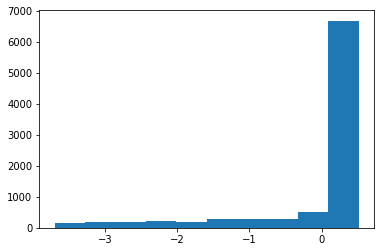

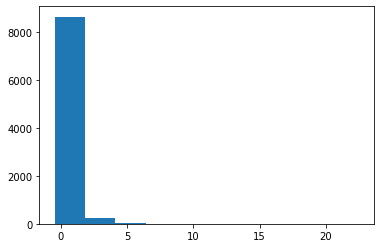

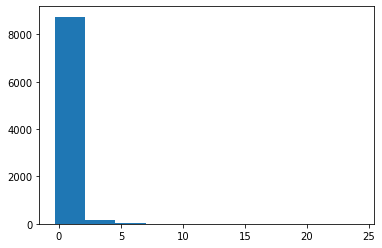

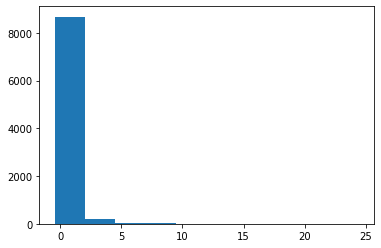

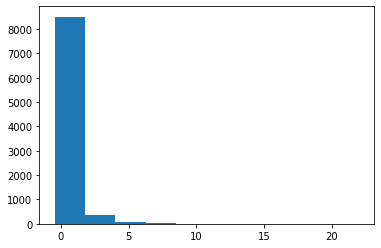

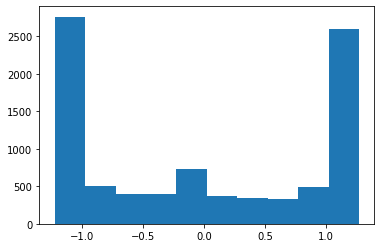

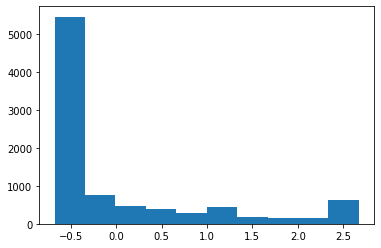

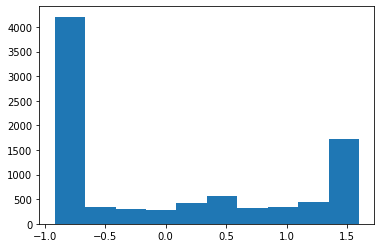

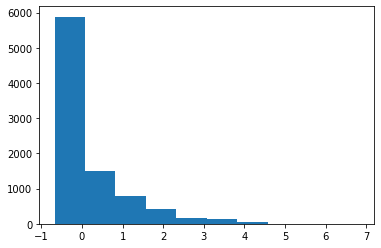

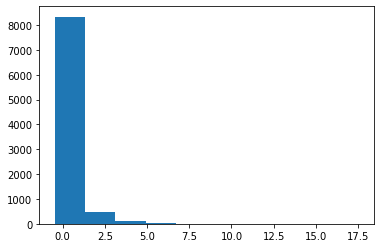

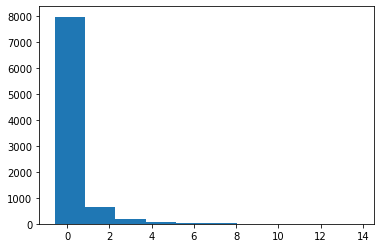

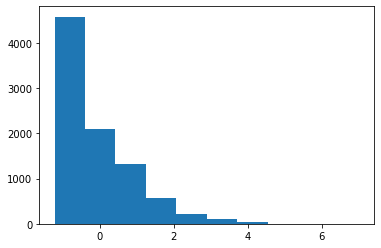

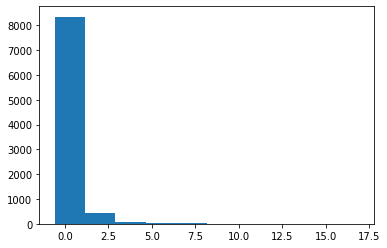

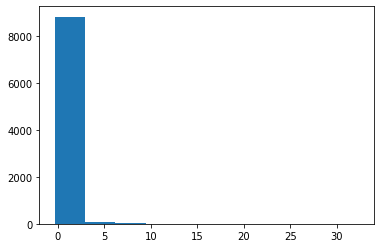

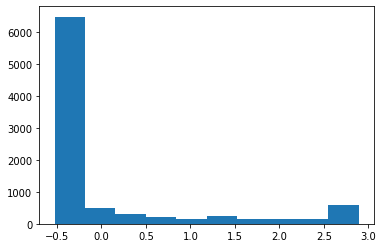

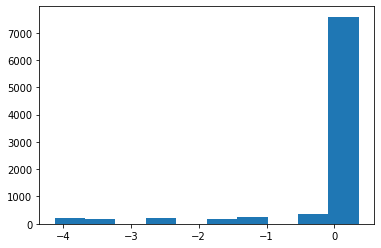

In [16]:
for i in new.columns:
    plt.hist(new[i])
    plt.show()

# KMeans

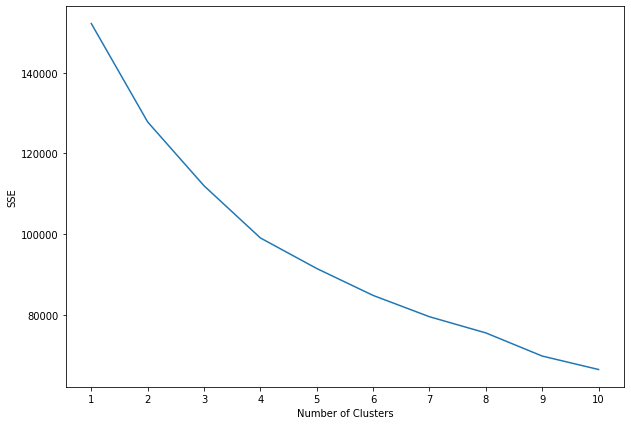

In [17]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_norm)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize = (10,7))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
km = KMeans(n_clusters= 3).fit(data_norm)
y = km.fit_predict(data_norm)
silhouette_score(data_norm,y)
np.unique(km.labels_, return_counts= True)

(array([0, 1, 2]), array([1561, 6114, 1275], dtype=int64))

### at first i used KMeans and choose number of clusters based on Elbow at 3 clusters 


# Hirarchical

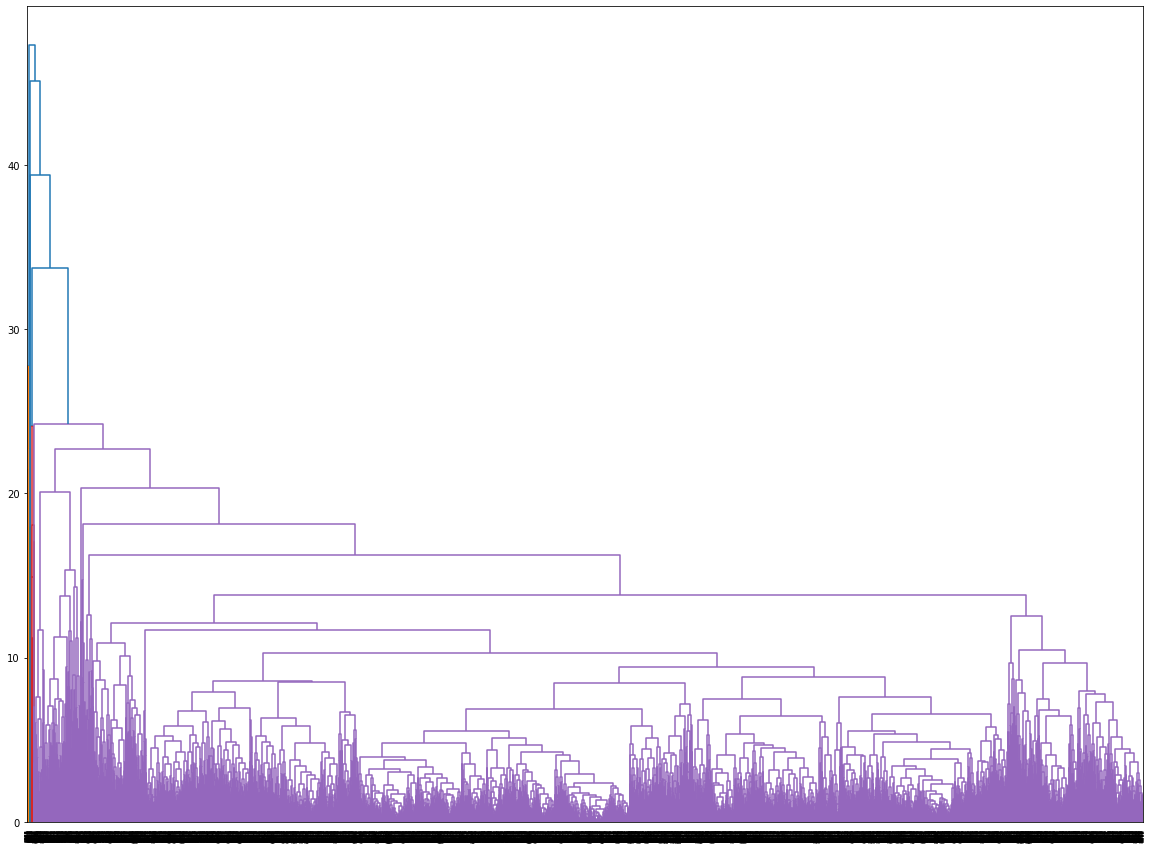

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 15))
#plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_norm, method="complete",metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
scores = []
for n in range(2, 10):
    model = AgglomerativeClustering(n_clusters=n) #3,2
    y=model.fit_predict(data_norm)

    scores.append([n,silhouette_score(data_norm,y)])

scores

[[2, 0.19210277656035374],
 [3, 0.1674469835551831],
 [4, 0.15978366986218748],
 [5, 0.17625723552382333],
 [6, 0.15927727217610124],
 [7, 0.16173398544339443],
 [8, 0.1608571104881932],
 [9, 0.16681499088780727]]

## best silhouette score at number of clusters is 3 and 2

In [ ]:
model = AgglomerativeClustering(n_clusters=2) #3,2
y=model.fit_predict(data_norm)

print("silhouette_score", silhouette_score(data_norm,y))

np.unique(model.labels_, return_counts= True)

silhouette_score 0.19210277656035374


(array([0, 1]), array([6069, 2881]))

In [22]:
model = AgglomerativeClustering(n_clusters=5) #3,2
y=model.fit_predict(data_norm)

print("silhouette_score", silhouette_score(data_norm,y))

np.unique(model.labels_, return_counts= True)

silhouette_score 0.17625723552382333


(array([0, 1, 2, 3, 4], dtype=int64),
 array([4093,  300, 1194, 2581,  782], dtype=int64))

In [ ]:
model = AgglomerativeClustering(n_clusters=4) #3,2
y=model.fit_predict(data_norm)

print("silhouette_score", silhouette_score(data_norm,y))

np.unique(model.labels_, return_counts= True)

silhouette_score 0.15978366986218748


(array([0, 1, 2, 3]), array([4875,  300, 1194, 2581]))

### after some trials, the best choice is 3 clusters. it is better based on number of points in each cluster

# DBSCAN

In [ ]:
mins = 36
nn = NearestNeighbors(n_neighbors= (mins + 1))

nn.fit(data_norm)

distances, neighbors = nn.kneighbors(data_norm)

distances

array([[0.        , 0.38472083, 0.46082212, ..., 0.89049222, 0.89242101,
        0.8928221 ],
       [0.        , 1.25818996, 1.34202417, ..., 1.84808176, 1.86957896,
        1.90207425],
       [0.        , 0.40460086, 0.66742355, ..., 1.27746313, 1.28691314,
        1.28872359],
       ...,
       [0.        , 0.9200107 , 0.9294804 , ..., 1.43649493, 1.45777999,
        1.48935513],
       [0.        , 1.11853639, 1.13335332, ..., 1.70081845, 1.7122772 ,
        1.71239672],
       [0.        , 1.48408941, 1.48652552, ..., 2.6519651 , 2.67138854,
        2.67536277]])

In [ ]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: elbow.png


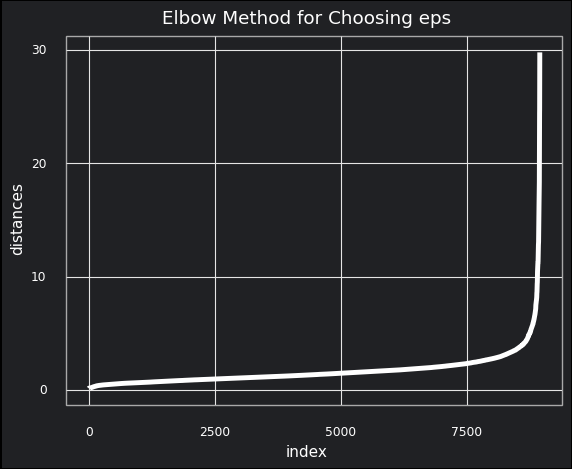

<ggplot: (8727982120186)>

In [ ]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [ ]:
db = DBSCAN(eps = 2.5, min_samples = 35).fit(data_norm)
y=db.fit_predict(data_norm)
print('silhouette_score', silhouette_score(data_norm ,y))
np.unique(db.labels_, return_counts= True)

silhouette_score 0.5153611078631587


(array([-1,  0]), array([ 533, 8417]))

### based on Elbow diagram i tried many times to change values of epsilon and min_samples and i found it's not much better in clustering data as it cluster data to one cluster and other points as noise, i think it's not suitable to cluster data


# Gaussian Mexture

In [ ]:
gm = GaussianMixture(3)
gm.fit(data_norm)
y = gm.predict(data_norm)
print(silhouette_score(data_norm, y))

np.unique(y, return_counts= True)

0.11271496035605896


(array([0, 1, 2]), array([3963, 2816, 2171]))

### actually i tried to use 2, 3 and 4 number of clusters but i found 3 no of clusters is more logic in clustering data 

# using PCA

#### Hirarchical

In [ ]:
from sklearn.decomposition import PCA
scores = []
for f in range(2,17):
    pca = PCA(f).fit(data_norm)
    df_pca = pca.transform(data_norm)
    fitted = pd.DataFrame(df_pca)
    fitted.head()

    for n in range(2,5):
        model = AgglomerativeClustering(n)
        y=model.fit_predict(fitted)
        scores.append([f,n,silhouette_score(fitted,y)])  
#5-2, 9-2, 6-2, 4-2

In [ ]:
scores

[[2, 2, 0.5739726239882592],
 [2, 3, 0.35925887004296647],
 [2, 4, 0.30362094879933627],
 [3, 2, 0.4367838471150095],
 [3, 3, 0.37594266823367756],
 [3, 4, 0.3184628226923642],
 [4, 2, 0.44209277397378993],
 [4, 3, 0.3668624859951843],
 [4, 4, 0.27651659447968036],
 [5, 2, 0.3607999186730306],
 [5, 3, 0.3033715445367285],
 [5, 4, 0.2179305132530671],
 [6, 2, 0.4126502142444653],
 [6, 3, 0.26465476916107816],
 [6, 4, 0.19202537249526505],
 [7, 2, 0.22293264106718344],
 [7, 3, 0.20164224506223824],
 [7, 4, 0.1996268150708189],
 [8, 2, 0.33717296172777034],
 [8, 3, 0.23205597859947186],
 [8, 4, 0.15236701649465384],
 [9, 2, 0.3763423390950944],
 [9, 3, 0.20089576728061806],
 [9, 4, 0.13666557817460537],
 [10, 2, 0.2470229802371707],
 [10, 3, 0.25115228196509437],
 [10, 4, 0.24157741037851352],
 [11, 2, 0.19186203052032433],
 [11, 3, 0.20120830474613838],
 [11, 4, 0.17632238169452946],
 [12, 2, 0.19181809281591042],
 [12, 3, 0.1497773900563875],
 [12, 4, 0.1490430917387688],
 [13, 2, 0.187

#### best score using 4 features and 2 clusters

In [ ]:
#5-2, 9-2, 6-2, 4-2
pca = PCA(7).fit(data_norm)
df_pca = pca.transform(data_norm)
fitted = pd.DataFrame(df_pca)

model = AgglomerativeClustering(3) #3,2
y=model.fit_predict(fitted)
print(silhouette_score(fitted,y))

np.unique(model.labels_, return_counts= True)

0.20164224506223816


(array([0, 1, 2]), array([3277, 4235, 1438]))

### i tried to choose the best solution, in my point of view the best solution is when i used 7 features and 3 clusters and i think its the best solution to cluster our data 

## Kmeans

In [ ]:
km_scores = []
for f in range(2,17):
    pca = PCA(f).fit(data_norm)
    df_pca = pca.transform(data_norm)
    fitted = pd.DataFrame(df_pca)
    km = KMeans(n_clusters= 3).fit(fitted)
    y = km.fit_predict(fitted)
    km_scores.append([f, silhouette_score(fitted,y)])

In [ ]:
km_scores

[[2, 0.4520338928843343],
 [3, 0.3801090874743088],
 [4, 0.34331581890931845],
 [5, 0.31599595390697166],
 [6, 0.2955427497022942],
 [7, 0.28447500825274313],
 [8, 0.2741044576237487],
 [9, 0.26211688392778665],
 [10, 0.2586454635517078],
 [11, 0.2561801428930932],
 [12, 0.25351994783876564],
 [13, 0.2529737996762321],
 [14, 0.25230060897457435],
 [15, 0.250649944766388],
 [16, 0.25061191709285996]]

#### best silhouette score of KMeans using PCA at 2 feature and 3 cluster: 45%

In [ ]:
pca = PCA(7).fit(data_norm)
df_pca = pca.transform(data_norm)
fitted = pd.DataFrame(df_pca)
km = KMeans(n_clusters= 3).fit(fitted)
y = km.fit_predict(fitted)
print(silhouette_score(fitted,y))

np.unique(km.labels_, return_counts= True)

0.283750395434568


(array([0, 1, 2], dtype=int32), array([1287, 6109, 1554]))

#### based on PCA and silhouette score i chooses 7 features and 3 clusters, i tried to cluster data using different number of clusters and number of features but i think this solution is much better than others

# Gaussian Mexture

In [ ]:
gm_scores = []
for f in range(2,17):
    pca = PCA(f).fit(data_norm)
    df_pca = pca.transform(data_norm)
    fitted = pd.DataFrame(df_pca)
    gm = GaussianMixture(3).fit(fitted)
    y = gm.predict(fitted)
    gm_scores.append([f, silhouette_score(fitted, y)])

gm_scores

[[2, 0.3373867063219048],
 [3, 0.3105203813352995],
 [4, 0.19353827363015824],
 [5, 0.15674219678761542],
 [6, 0.11650533912643442],
 [7, 0.12198471427202132],
 [8, 0.07793609369871972],
 [9, 0.08163464684356189],
 [10, 0.07588409807901222],
 [11, 0.06236260375536289],
 [12, 0.08379560422431341],
 [13, 0.07209108451850757],
 [14, 0.08298788833001884],
 [15, 0.10286401568591848],
 [16, 0.11085138863978986]]

#### best score of Gaussian Mexture using PCA at 2 features and 3 number of components: 33.7%

In [ ]:
pca = PCA(2).fit(data_norm)
df_pca = pca.transform(data_norm)
fitted = pd.DataFrame(df_pca)
gm = GaussianMixture(3).fit(fitted)
y = gm.predict(fitted)
gm_scores.append([f, silhouette_score(fitted, y)])

np.unique(y, return_counts= True)

(array([0, 1, 2]), array([1307, 2761, 4882]))

In [ ]:
pca = PCA(5).fit(data_norm)
df_pca = pca.transform(data_norm)
fitted = pd.DataFrame(df_pca)
gm = GaussianMixture(3).fit(fitted)
y = gm.predict(fitted)
gm_scores.append([f, silhouette_score(fitted, y)])

np.unique(y, return_counts= True)

(array([0, 1, 2]), array([3850, 2346, 2754]))

### from the results of PCA i found from no of features = 8 to 16 they are almost the same so i tried to use 7 features with 3 no of clusters then i checked the number of of points in each cluster i think its much better and i tried to use 2 features but i found there is slightly difference between 2 and 7 features so i choose 7 to not lose information about data


# DBSCAN

In [ ]:
db_scores = []

for f in range(2,17):
    pca = PCA(f).fit(data_norm)
    df_pca = pca.transform(data_norm)
    fitted = pd.DataFrame(df_pca)

    db = DBSCAN(eps = 2.5, min_samples = 36).fit(fitted)
    y=db.fit_predict(fitted)
    db_scores.append([f, silhouette_score(fitted, y)])

db_scores

[[2, 0.8104808766070396],
 [3, 0.7728702131880973],
 [4, 0.7209771313794544],
 [5, 0.6831038049679227],
 [6, 0.6577712992634642],
 [7, 0.6279547601837809],
 [8, 0.6053037885107395],
 [9, 0.587208751749875],
 [10, 0.5745859061271565],
 [11, 0.5654138448941317],
 [12, 0.5512705223055482],
 [13, 0.5397862465929304],
 [14, 0.5272645292606839],
 [15, 0.5171859615607569],
 [16, 0.514243205645705]]

#### best score at 2 features and eps = 2.5, min_samples = 36: 81%

In [ ]:
pca = PCA(7).fit(data_norm)
df_pca = pca.transform(data_norm)
fitted = pd.DataFrame(df_pca)
db = DBSCAN(eps = 2.5, min_samples = 36).fit(fitted)
y = db.fit_predict(fitted)
db_scores.append([f, silhouette_score(fitted, y)])

np.unique(db.labels_, return_counts= True)

(array([-1,  0]), array([ 223, 8727]))

### i tried many times to choose number of epsilon and min_samples but i think DBSCAN is not good to cluster our data

# at the end i think the best model and solution to cluster data is Agglomerativeclustering using PCA to choose 7 features and using 3 clusters